In [148]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('train_set.csv')
train_df

,id,PID,T,A,T0,R,T1,W,label,P1,P2,P3,P4,P5
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121894,120093,L50627,L,301.7,310.6,1426,49.5,216,1,1,0,0,0,0
121895,120160,L51344,L,302.2,310.6,1346,63.9,109,1,0,1,1,0,0
121896,120300,L53258,L,300.8,310.7,1339,59.2,203,1,0,0,0,1,0
121897,120575,L48027,L,296.4,307.4,1515,5.6,213,1,0,0,0,0,0


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'A'}>,
        <Axes: title={'center': 'T0'}>],
       [<Axes: title={'center': 'R'}>, <Axes: title={'center': 'T1'}>,
        <Axes: title={'center': 'W'}>],
       [<Axes: title={'center': 'label'}>,
        <Axes: title={'center': 'P1'}>, <Axes: title={'center': 'P2'}>],
       [<Axes: title={'center': 'P3'}>, <Axes: title={'center': 'P4'}>,
        <Axes: title={'center': 'P5'}>]], dtype=object)

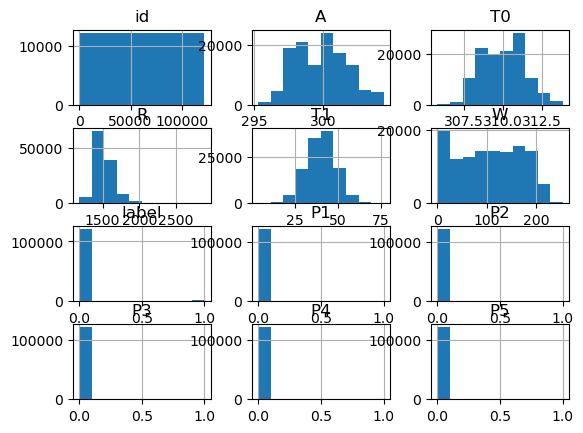

In [149]:
train_df.hist()

In [150]:
train_df[train_df['label'] == 1]

,id,PID,T,A,T0,R,T1,W,label,P1,P2,P3,P4,P5
119999,130,L52498,L,303.9,312.8,1345,56.5,21,1,0,0,0,0,0
120000,164,L51721,L,302.5,310.4,1307,54.8,174,1,0,1,0,0,0
120001,228,M17895,M,300.7,309.7,1878,27.9,20,1,0,0,0,0,0
120002,236,L55926,L,297.3,308.6,1258,61.8,144,1,0,0,0,1,0
120003,247,L51801,L,303.0,311.3,1341,51.0,174,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121894,120093,L50627,L,301.7,310.6,1426,49.5,216,1,1,0,0,0,0
121895,120160,L51344,L,302.2,310.6,1346,63.9,109,1,0,1,1,0,0
121896,120300,L53258,L,300.8,310.7,1339,59.2,203,1,0,0,0,1,0
121897,120575,L48027,L,296.4,307.4,1515,5.6,213,1,0,0,0,0,0


In [151]:
label = train_df['label']
label

0         0
1         0
2         0
3         0
4         0
         ..
121894    1
121895    1
121896    1
121897    1
121898    1
Name: label, Length: 121899, dtype: int64

In [152]:
train_df = train_df.drop(columns = ['label','PID','id'])
train_df

,T,A,T0,R,T1,W,P1,P2,P3,P4,P5
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
121894,L,301.7,310.6,1426,49.5,216,1,0,0,0,0
121895,L,302.2,310.6,1346,63.9,109,0,1,1,0,0
121896,L,300.8,310.7,1339,59.2,203,0,0,0,1,0
121897,L,296.4,307.4,1515,5.6,213,0,0,0,0,0


In [157]:
train_df['P5'].unique()

array([0, 1])

In [159]:
from sklearn.metrics import precision_recall_curve, auc
import optuna
from sklearn.metrics import roc_auc_score
from functools import partial
import lightgbm as lgb

def pr_curve_metric(y_pred,y_true):
    """
    Пользовательская метрика для LightGBM:
    Precision и Recall
    """
    #print(np.array(y_true.get_label()))
    #print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=')
    #print(np.array(y_pred))
    precision, recall, _ = precision_recall_curve(np.array(y_true.get_label()), np.array(y_pred))

    # Рассчитываем AUC
    pr_auc = auc(recall, precision)
    #print(pr_auc)
    return 'pr_auc', pr_auc, True 

In [160]:
from sklearn.model_selection import train_test_split
X, y = train_df, label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print('train -  {}   |   test -  {}'.format(
        np.bincount(y_train), np.bincount(y_test)))

train -  [95999  1520]   |   test -  [24000   380]


In [161]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
97514    0
97515    0
97516    0
97517    0
97518    0
Name: label, Length: 97519, dtype: int64

In [132]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
#X, y = X_train, y_train
skf = StratifiedKFold(n_splits=6)
models = []


for train, test in skf.split(X_train, y_train):
    
     y_train[train]
     y_train[test]
     print('train -  {}   |   test -  {}'.format(
         np.bincount(y_train[train]), np.bincount(y_train[test])))
     X_tr = X_train.iloc[train]
     X_val = X_train.iloc[test]
     y_tr = y_train[train]
     y_val = y_train[test]
     balance_const = y_tr[y_tr == 0].shape[0] / y_tr[y_tr == 1].shape[0] 
     params = {
         'objective': 'binary', # logloss
         'eta': 0.01,
         'verbose': -1,
         'nthread': 16,
         'metric': 'prauc',
         #'scale_pos_weight': balance_const
     }
     lgb_tr = lgb.Dataset(X_tr, y_tr, free_raw_data=False)
     lgb_val = lgb.Dataset(X_val, y_val, free_raw_data=False)


     #print(y_val)
     model = lgb.train(
         params, lgb_tr, num_boost_round=100, valid_sets=[lgb_val], valid_names=['val'],feval=pr_curve_metric,
         callbacks=[lgb.early_stopping(80, verbose=False),lgb.log_evaluation(period=10)]
     )
     models.append(model)

train -  [79999  1266]   |   test -  [16000   254]
[10]	val's pr_auc: 0.811377
[20]	val's pr_auc: 0.811257
[30]	val's pr_auc: 0.812713
[40]	val's pr_auc: 0.811615
[50]	val's pr_auc: 0.811357
[60]	val's pr_auc: 0.811605
[70]	val's pr_auc: 0.811645
[80]	val's pr_auc: 0.811293
train -  [79999  1267]   |   test -  [16000   253]
[10]	val's pr_auc: 0.852703
[20]	val's pr_auc: 0.85222
[30]	val's pr_auc: 0.852694
[40]	val's pr_auc: 0.852809
[50]	val's pr_auc: 0.853589
[60]	val's pr_auc: 0.853593
[70]	val's pr_auc: 0.853387
[80]	val's pr_auc: 0.853503
[90]	val's pr_auc: 0.853307
[100]	val's pr_auc: 0.853004
train -  [79999  1267]   |   test -  [16000   253]
[10]	val's pr_auc: 0.837049
[20]	val's pr_auc: 0.837218
[30]	val's pr_auc: 0.836824
[40]	val's pr_auc: 0.831319
[50]	val's pr_auc: 0.83075
[60]	val's pr_auc: 0.830579
[70]	val's pr_auc: 0.830874
[80]	val's pr_auc: 0.831186
[90]	val's pr_auc: 0.831096
train -  [79999  1267]   |   test -  [16000   253]
[10]	val's pr_auc: 0.814366
[20]	val's pr

In [163]:
X_train

,T,A,T0,R,T1,W,P1,P2,P3,P4,P5
0,L,298.7,310.2,1487,47.7,70,0,0,0,0,0
1,L,299.1,310.6,1276,53.6,155,0,0,0,0,0
2,L,297.8,309.8,1391,49.9,192,0,0,0,0,0
3,L,298.8,308.8,1497,37.7,71,0,0,0,0,0
4,H,302.8,312.3,1526,40.4,156,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
97514,M,300.1,309.2,1547,33.7,218,0,0,0,0,0
97515,L,300.5,310.5,1543,36.2,30,0,0,0,0,0
97516,M,298.7,309.5,1487,33.6,64,0,0,0,0,0
97517,L,301.9,310.7,1475,46.3,124,0,0,0,0,0


In [170]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
import numpy as np

# X, y = X_train, y_train
skf = StratifiedKFold(n_splits=6)
models = []

categorical_features_indices =[0,6,7,8,9,10]

for train, test in skf.split(X_train, y_train):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y_train[train]), np.bincount(y_train[test])))
    
    X_tr = X_train.iloc[train]
    X_val = X_train.iloc[test]
    y_tr = y_train[train]
    y_val = y_train[test]

    # Определяем параметры для CatBoost
    params = {
        'iterations': 1000,
        'learning_rate': 0.01,
        'depth': 6,
        'eval_metric': 'PRAUC',  # Вы можете использовать 'Logloss' или другие метрики
        'cat_features': categorical_features_indices,
        'early_stopping_rounds': 80,
        'verbose': 10
    }

    # Создаем Pool для обучения и валидации
    train_pool = Pool(X_tr, y_tr, cat_features=categorical_features_indices)
    val_pool = Pool(X_val, y_val, cat_features=categorical_features_indices)

    # Обучаем модель
    model = CatBoostClassifier(**params)
    model.fit(train_pool, eval_set=val_pool)

    models.append(model)


train -  [79999  1266]   |   test -  [16000   254]
0:	learn: 0.7510555	test: 0.7140267	best: 0.7140267 (0)	total: 89.1ms	remaining: 1m 29s
10:	learn: 0.8255217	test: 0.7884932	best: 0.7884932 (10)	total: 499ms	remaining: 44.8s
20:	learn: 0.8281312	test: 0.7907886	best: 0.7909100 (19)	total: 889ms	remaining: 41.4s
30:	learn: 0.8265358	test: 0.7891111	best: 0.7909100 (19)	total: 1.3s	remaining: 40.7s
40:	learn: 0.8259288	test: 0.7856953	best: 0.7909100 (19)	total: 1.7s	remaining: 39.8s
50:	learn: 0.8285622	test: 0.7889369	best: 0.7909100 (19)	total: 2.09s	remaining: 38.9s
60:	learn: 0.8280743	test: 0.7900106	best: 0.7909100 (19)	total: 2.5s	remaining: 38.4s
70:	learn: 0.8297724	test: 0.7926142	best: 0.7926142 (70)	total: 2.9s	remaining: 37.9s
80:	learn: 0.8310867	test: 0.7934091	best: 0.7936730 (79)	total: 3.31s	remaining: 37.5s
90:	learn: 0.8327946	test: 0.7939736	best: 0.7943041 (87)	total: 3.74s	remaining: 37.3s
100:	learn: 0.8332964	test: 0.7950363	best: 0.7950363 (100)	total: 4.16s	

In [145]:
from sklearn.linear_model import LogisticRegression

X_train = pd.get_dummies(X_train, columns=['T'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['T'], drop_first=True)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print(len(y_test))
print(len(y_pred))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc(recall, precision)

24380
24380


/home/sick-bastart/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.298688682329285

In [171]:
def pred(models,X,y):
    pred = []
    for i in range(len(models)):
        pr = models[i].predict(X)
        pred.append(pr)
    pred = np.array(pred)
    ans = np.sum(pred,axis=0)/len(models)
    return ans

In [172]:
y_pred = pred(models,X_test,y_test)
print(len(y_test))
print(len(y_pred))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc(recall, precision)

24380
24380


0.8755013921812057

In [137]:
y_test[y_test > 0]

8        1
48       1
212      1
276      1
299      1
        ..
23897    1
23898    1
23990    1
24065    1
24212    1
Name: label, Length: 380, dtype: int64

In [138]:
y_pred[y_test > 0]

array([0.28264033, 0.28448999, 0.28544487, 0.2866509 , 0.01880174,
       0.28411352, 0.28448999, 0.28448999, 0.28544487, 0.28411352,
       0.28448999, 0.2866509 , 0.28448999, 0.28448999, 0.28221277,
       0.2866509 , 0.28221277, 0.03374943, 0.28544487, 0.28221277,
       0.28448999, 0.28544487, 0.28411352, 0.28221277, 0.28544487,
       0.28448999, 0.28507947, 0.28549156, 0.28583895, 0.28544487,
       0.05985589, 0.28448999, 0.28221277, 0.28448999, 0.07318282,
       0.0310396 , 0.01186739, 0.28411352, 0.01363916, 0.28544487,
       0.28221277, 0.28221277, 0.28411352, 0.28544487, 0.28661308,
       0.01185291, 0.28544487, 0.01454984, 0.28448999, 0.28221277,
       0.28448999, 0.28221277, 0.28544487, 0.28544487, 0.28544487,
       0.0185039 , 0.2866509 , 0.01526543, 0.28544487, 0.28544487,
       0.28221277, 0.28411352, 0.2847592 , 0.28448999, 0.28661308,
       0.28221277, 0.28544487, 0.28544487, 0.28544487, 0.28544487,
       0.28221277, 0.28544487, 0.28544487, 0.2847592 , 0.02406

In [139]:
y_pred.max()

0.2866508951726084

In [84]:
balance_const = y_tr[y_tr == 0].shape[0] / y_tr[y_tr == 1].shape[0] 
params = {
    'objective': 'binary', # logloss
    'eta': 0.01,
    'verbose': -1,
    'nthread': 16,
    'metric': 'prauc',
    'scale_pos_weight': balance_const*0.015
}
lgb_tr = lgb.Dataset(X_tr, y_tr, free_raw_data=False)
lgb_val = lgb.Dataset(X_val, y_val, free_raw_data=False)
#print(y_val)
model = lgb.train(
    params, lgb_tr, num_boost_round=100, valid_sets=[lgb_val], valid_names=['val'],feval=pr_curve_metric,
    callbacks=[lgb.early_stopping(80, verbose=False),lgb.log_evaluation(period=10)]
)

[10]	val's pr_auc: 0.844428
[20]	val's pr_auc: 0.847668
[30]	val's pr_auc: 0.85026
[40]	val's pr_auc: 0.847652
[50]	val's pr_auc: 0.848721
[60]	val's pr_auc: 0.849247
[70]	val's pr_auc: 0.8506
[80]	val's pr_auc: 0.851452
[90]	val's pr_auc: 0.853164
[100]	val's pr_auc: 0.854002


In [52]:
import optuna
from sklearn.metrics import roc_auc_score
from functools import partial
import lightgbm as lgb

def objective(trial, X_tr, y_tr, X_val, y_val):
    balance_const = y_tr[y_tr == 0].shape[0] / y_tr[y_tr == 1].shape[0] 
    params = {
        'objective': 'binary', # logloss
        'eta': 0.1,
        'verbose': -1,
        'nthread': 16,
        'metric': 'prauc',
        'scale_pos_weight': trial.suggest_float('scale_pos_weight / is_unbalance', 0.01, 1000, log=True) * balance_const
    }
    lgb_tr = lgb.Dataset(X_tr, y_tr, free_raw_data=False)
    lgb_val = lgb.Dataset(X_val, y_val, free_raw_data=False)
    #print(y_val)
    model = lgb.train(
        params, lgb_tr, num_boost_round=100, valid_sets=[lgb_val], valid_names=['val'],feval=pr_curve_metric,
        callbacks=[lgb.early_stopping(5, verbose=False),lgb.log_evaluation(period=10)]
    )
    y_raw = model.predict(X_val, raw_score=True)
    
    auc = pr_curve_metric(y_val, y_raw)
    return auc



def study_scale_pos_weight(X_tr, y_tr, X_val, y_val, n_trials=120, n_jobs=1):
    sampler = optuna.samplers.TPESampler(n_startup_trials=100)
    study = optuna.create_study(sampler=sampler, directions=['maximize'])

    func = partial(objective, X_tr=X_tr, y_tr=y_tr, X_val=X_val, y_val=y_val)
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study.optimize(func, n_trials=n_trials, n_jobs=n_jobs)
    
    return study




In [53]:
X

,id,T,A,T0,R,T1,W,P1,P2,P3,P4,P5
0,0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
121894,120093,L,301.7,310.6,1426,49.5,216,1,0,0,0,0
121895,120160,L,302.2,310.6,1346,63.9,109,0,1,1,0,0
121896,120300,L,300.8,310.7,1339,59.2,203,0,0,0,1,0
121897,120575,L,296.4,307.4,1515,5.6,213,0,0,0,0,0


In [54]:
X['T'] = X['T'].astype('category')

In [55]:
studies = [] 
for train, test in skf.split(X, y):
    X_tr = X.iloc[train]
    y_tr = y[train]
    X_val = X.iloc[test]
    y_val = y[test]
    study = study_scale_pos_weight(X_tr, y_tr, X_val, y_val)
    studies.append(study)

[W 2024-09-24 13:09:22,996] Trial 0 failed with parameters: {'scale_pos_weight / is_unbalance': 0.01328381058729644} because of the following error: TypeError('cannot unpack non-iterable numpy.float64 object').
Traceback (most recent call last):
  File "/home/sick-bastart/anaconda3/lib/python3.11/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_99566/3738948314.py", line 19, in objective
    model = lgb.train(
            ^^^^^^^^^^
  File "/home/sick-bastart/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py", line 283, in train
    evaluation_result_list.extend(booster.eval_valid(feval))
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sick-bastart/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py", line 4159, in eval_valid
    return [item for i in range(1, self.__num_dataset)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

[0. 0. 0. ... 1. 1. 1.]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
[0.01423738 0.01423738 0.01423738 ... 0.9051558  0.76692994 0.9051558 ]


TypeError: cannot unpack non-iterable numpy.float64 object

In [ ]:
studies

In [107]:
studies[0].best_trial

FrozenTrial(number=30, state=1, values=[0.8594986213086734], datetime_start=datetime.datetime(2024, 9, 15, 12, 22, 50, 847674), datetime_complete=datetime.datetime(2024, 9, 15, 12, 22, 51, 656868), params={'scale_pos_weight / is_unbalance': 0.01608479090100502}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'scale_pos_weight / is_unbalance': FloatDistribution(high=1000.0, log=True, low=0.01, step=None)}, trial_id=30, value=None)

In [108]:
studies[1].best_trial

FrozenTrial(number=100, state=1, values=[0.8211309836528894], datetime_start=datetime.datetime(2024, 9, 15, 12, 23, 54, 848273), datetime_complete=datetime.datetime(2024, 9, 15, 12, 23, 56, 951360), params={'scale_pos_weight / is_unbalance': 3.1575768713890544}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'scale_pos_weight / is_unbalance': FloatDistribution(high=1000.0, log=True, low=0.01, step=None)}, trial_id=100, value=None)

In [32]:
y_pred = [0.1, 0.2, 0.5, 0.2]
y_true = [0.2, 0.25, 0.2, 0.3]
th = 0.2
y_pred = [1 if value > th else 0 for value in y_pred]
y_true = [1 if value > th else 0 for value in y_true]
precision_recall_curve(np.array(y_true), np.array(y_pred))

(array([0.5, 0. , 1. ]), array([1., 0., 0.]), array([0, 1]))